## Observations and Insights 

1. An observation is that the tumor volume seeems to decrease in size as the timepoint increases for a mouse treated with Capomulin.
2. Another observation is that in these study data files the female mouse population vs the male mouse population is about equal.
3. Lastly, there seems to be a relatively strong correlation between the weight of a mouse and its' tumor volume size. 

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
# Checking the number of mice.

mice_number = merged_data["Mouse ID"].unique()
mice_number = len(mice_number)
mice_number

249

In [22]:
# Getting the duplicate entries by mouse ID number that show up for Mouse ID and Timepoint. 

# duplicated_mice = merged_data.copy()

# duplicate_mice = duplicated_mice[["Mouse ID", "Timepoint"]].drop_duplicates()
# duplicate_mice

duplicate_mice = merged_data.loc[merged_data.duplicated(["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [23]:
# Optional: Get all the data for the duplicate mouse ID. 

all_duplicate_data=pd.DataFrame(duplicate_mice)
all_duplicate_data

,0
0,g989


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
revised_mice_df = merged_data[merged_data["Mouse ID"].isin(duplicate_mice)==False]
revised_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [25]:
# Checking the number of mice in the clean DataFrame.

clean_mice_number = revised_mice_df["Mouse ID"].unique()
clean_mice_number = len(clean_mice_number)
clean_mice_number

248

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = revised_mice_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
#mean

median = revised_mice_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
#median

variance = revised_mice_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
#variance

std = revised_mice_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
#std

sem = revised_mice_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
#sem


summ_stats = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": variance,
    "Standard Deviation": std,
    "SEM": sem
})

summ_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = revised_mice_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
#mean

median = revised_mice_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
#median

variance = revised_mice_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
#variance

std = revised_mice_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
#std

sem = revised_mice_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
#sem

# Using the aggregation method, produce the same summary statistics in a single line

extra_revised = revised_mice_df.drop(columns=['Mouse ID', 'Sex'])

df_group_by = extra_revised.groupby('Drug Regimen')
summary_stats_agg = df_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Timepoint'>

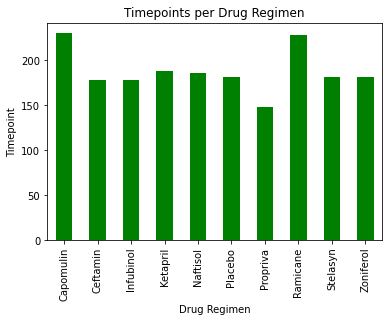

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_revised = revised_mice_df.drop(columns=['Mouse ID', 'Sex', 'Age_months', 'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites'])

bar_revised_group = bar_revised.groupby(['Drug Regimen']).count()['Timepoint']

pandas_plot = bar_revised_group.plot.bar(color='g')
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoint')
plt.title('Timepoints per Drug Regimen')
pandas_plot


Text(0, 0.5, 'Number of Mice')

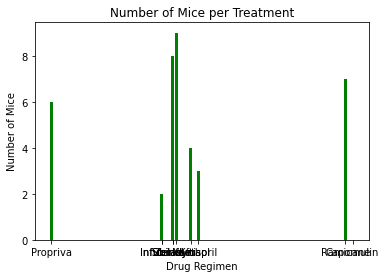

In [29]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mice_list = (revised_mice_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_list

x_axis = np.arange(len(bar_revised_group))

tick_label = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

plt.bar(mice_list, x_axis, tick_label = tick_label,
        width = 0.8, color = ['green'])


plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

Text(0, 0.5, 'Sex')

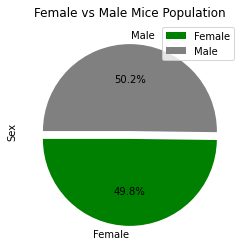

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = merged_data.groupby(["Mouse ID", "Sex"])
gender_df = pd.DataFrame(gender.size())

mice_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mice_gender.columns = ["Count"]

mice_gender["Percentage"] = (100*(mice_gender["Count"]/mice_gender["Count"].sum()))

mice_gender        

plot = mice_gender.plot.pie(y="Count", colors = (['green', 'gray']), startangle = 180, explode = (0.09,0), autopct="%1.1f%%")

plt.title('Female vs Male Mice Population')
plt.ylabel('Sex')

Text(0, 0.5, 'Sex')

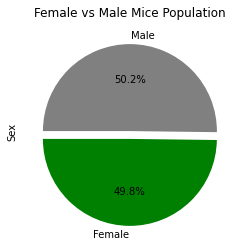

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.799197,50.200803]
colors = ['green', 'gray']
explode = (0.09,0)
fig1, ax1 = plt.subplots()
plt.pie(sizes, explode = explode,labels = labels, colors = colors, autopct = "%1.1f%%", startangle = 180)
plt.title('Female vs Male Mice Population')
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
capomulin_df = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin",:]
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin, merged_data, on=("Mouse ID", "Timepoint"),how="left")
capomulin_merge.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [53]:
# Put treatments into a list for a for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [54]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

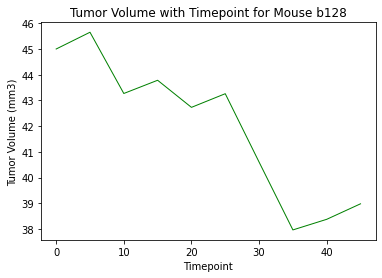

In [55]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
capomulin_df = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin",:]
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin, merged_data, on = ("Mouse ID", "Timepoint"), how = "left")
capomulin_merge.head()

tumor_mouse_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b128",:]
tumor_mouse_df.head()

x_axis = tumor_mouse_df['Timepoint']
y_axis = tumor_mouse_df['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis, linewidth=1, color="green", label="Fahreneit")
plt.title('Tumor Volume with Timepoint for Mouse b128')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Tumor Volume (mm3)')

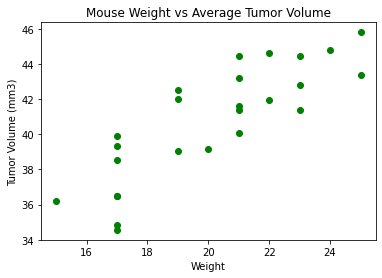

In [56]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_vol =capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(capomulin_vol['Weight (g)'],capomulin_vol['Tumor Volume (mm3)'], color='green')
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')

## Correlation and Regression

slope:0.9544396890241049
intercept:21.552160532685008
r-value:0.8419363424694721
correlation coefficient:0.841936342469472
stderr:0.12754359033201323
r-squared: 0.7088568047708723
y = 0.95x + 21.55


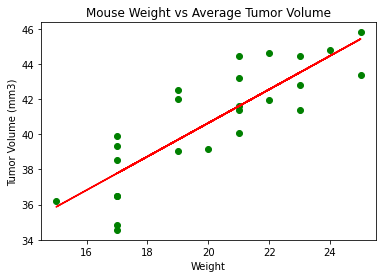

In [51]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_df = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin",:]
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin, merged_data, on=("Mouse ID","Timepoint"),how="left")
capomulin_merge.head()


correlation = st.pearsonr(capomulin_vol['Weight (g)'], capomulin_vol['Tumor Volume (mm3)'])[0]
correlation

x_values = capomulin_vol['Weight (g)']
y_values = capomulin_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"r-value:{rvalue}")
print(f"correlation coefficient:{correlation}")
print(f"stderr:{stderr}")
print(f"r-squared: {rvalue**2}")


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

capomulin_vol =capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(capomulin_vol['Weight (g)'],capomulin_vol['Tumor Volume (mm3)'], color='green')
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x_values,regress_values,"r-")
